<a href="https://colab.research.google.com/github/ericrizzatti/TelecomX_2/blob/main/TelecomX_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [5]:
df_completo = pd.read_csv('/content/dados_tratados.csv')
df_completo.head(5)

customerID Churn     gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO   N√£o   Feminino              0     Sim        Sim       9   
1  0003-MKNFE   N√£o  Masculino              0     N√£o        N√£o       9   
2  0004-TLHLJ   Sim  Masculino              0     N√£o        N√£o       4   
3  0011-IGKFF   Sim  Masculino              1     Sim        N√£o      13   
4  0013-EXCHZ   Sim   Feminino              1     Sim        N√£o       3   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0          Sim           N√£o             DSL  ...              N√£o   
1          Sim           Sim             DSL  ...              N√£o   
2          Sim           N√£o     Fibra √≥tica  ...              Sim   
3          Sim           N√£o     Fibra √≥tica  ...              Sim   
4          Sim           N√£o     Fibra √≥tica  ...              N√£o   

  TechSupport StreamingTV StreamingMovies   Contract PaperlessBilling  \
0         Sim         Sim             N√£o     Um ano              Sim   
1         N√£o         N√£o             Sim  M√™s a m√™s              N√£o   
2         N√£o         N√£o             N√£o  M√™s a m√™s              Sim   
3         N√£o         Sim             Sim  M√™s a m√™s              Sim   
4         Sim         Sim             N√£o  M√™s a m√™s              Sim   

        PaymentMethod Charges.Monthly Charges.Total  Contas_Diarias  
0  Cheque por correio            65.6        593.30        2.197407  
1  Cheque por correio            59.9        542.40        2.008889  
2   Cheque eletr√¥nico            73.9        280.85        2.340417  
3   Cheque eletr√¥nico            98.0       1237.85        3.173974  
4  Cheque por correio            83.9        267.40        2.971111  

[5 rows x 22 columns]

In [6]:
dados = df_completo.drop(['customerID','PaperlessBilling','Charges.Total','Contas_Diarias'], axis=1)

In [7]:
dados.head()

Churn     gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   N√£o   Feminino              0     Sim        Sim       9          Sim   
1   N√£o  Masculino              0     N√£o        N√£o       9          Sim   
2   Sim  Masculino              0     N√£o        N√£o       4          Sim   
3   Sim  Masculino              1     Sim        N√£o      13          Sim   
4   Sim   Feminino              1     Sim        N√£o       3          Sim   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0           N√£o             DSL            N√£o          Sim              N√£o   
1           Sim             DSL            N√£o          N√£o              N√£o   
2           N√£o     Fibra √≥tica            N√£o          N√£o              Sim   
3           N√£o     Fibra √≥tica            N√£o          Sim              Sim   
4           N√£o     Fibra √≥tica            N√£o          N√£o              N√£o   

  TechSupport StreamingTV StreamingMovies   Contract       PaymentMethod  \
0         Sim         Sim             N√£o     Um ano  Cheque por correio   
1         N√£o         N√£o             Sim  M√™s a m√™s  Cheque por correio   
2         N√£o         N√£o             N√£o  M√™s a m√™s   Cheque eletr√¥nico   
3         N√£o         Sim             Sim  M√™s a m√™s   Cheque eletr√¥nico   
4         Sim         Sim             N√£o  M√™s a m√™s  Cheque por correio   

   Charges.Monthly  
0             65.6  
1             59.9  
2             73.9  
3             98.0  
4             83.9

In [8]:
colunas = dados.columns
colunas

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod', 'Charges.Monthly'],
      dtype='object')

In [9]:
for i in colunas:
  print(f'valores unicos de {i} : {dados[i].unique()}')

valores unicos de Churn : ['N√£o' 'Sim']
valores unicos de gender : ['Feminino' 'Masculino']
valores unicos de SeniorCitizen : [0 1]
valores unicos de Partner : ['Sim' 'N√£o']
valores unicos de Dependents : ['Sim' 'N√£o']
valores unicos de tenure : [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
valores unicos de PhoneService : ['Sim' 'N√£o']
valores unicos de MultipleLines : ['N√£o' 'Sim' 'Sem servi√ßo telef√¥nico']
valores unicos de InternetService : ['DSL' 'Fibra √≥tica' 'N√£o']
valores unicos de OnlineSecurity : ['N√£o' 'Sim' 'Sem servi√ßo de internet']
valores unicos de OnlineBackup : ['Sim' 'N√£o' 'Sem servi√ßo de internet']
valores unicos de DeviceProtection : ['N√£o' 'Sim' 'Sem servi√ßo de internet']
valores unicos de TechSupport : ['Sim' 'N√£o' 'Sem servi√ßo de internet']
valores unicos de StreamingTV : 

In [10]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
colunas_categoricas = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    colunas_categoricas),
    remainder='passthrough')
dados_hot = one_hot_enc.fit_transform(dados)
dados_hot = pd.DataFrame(dados_hot , columns=one_hot_enc.get_feature_names_out())
dados_hot

onehotencoder__MultipleLines_N√£o  \
0                                 1.0   
1                                 0.0   
2                                 1.0   
3                                 1.0   
4                                 1.0   
...                               ...   
7038                              1.0   
7039                              0.0   
7040                              1.0   
7041                              1.0   
7042                              0.0   

     onehotencoder__MultipleLines_Sem servi√ßo telef√¥nico  \
0                                                   0.0    
1                                                   0.0    
2                                                   0.0    
3                                                   0.0    
4                                                   0.0    
...                                                 ...    
7038                                                0.0    
7039                                                0.0    
7040                                                0.0    
7041                                                0.0    
7042                                                1.0    

     onehotencoder__MultipleLines_Sim onehotencoder__InternetService_DSL  \
0                                 0.0                                1.0   
1                                 1.0                                1.0   
2                                 0.0                                0.0   
3                                 0.0                                0.0   
4                                 0.0                                0.0   
...                               ...                                ...   
7038                              0.0                                1.0   
7039                              1.0                                0.0   
7040                              0.0                                1.0   
7041                              0.0                                1.0   
7042                              0.0                                1.0   

     onehotencoder__InternetService_Fibra √≥tica  \
0                                           0.0   
1                                           0.0   
2                                           1.0   
3                                           1.0   
4                                           1.0   
...                                         ...   
7038                                        0.0   
7039                                        1.0   
7040                                        0.0   
7041                                        0.0   
7042                                        0.0   

     onehotencoder__InternetService_N√£o onehotencoder__OnlineSecurity_N√£o  \
0                                   0.0                               1.0   
1                                   0.0                               1.0   
2                                   0.0                               1.0   
3                                   0.0                               1.0   
4                                   0.0                               1.0   
...                                 ...                               ...   
7038                                0.0                               0.0   
7039                                0.0                               1.0   
7040                                0.0                               1.0   
7041                                0.0                               0.0   
7042                                0.0                               0.0   

     onehotencoder__OnlineSecurity_Sem servi√ßo de internet  \
0                                                   0.0      
1                                                   0.0      
2                                                   0.0      
3                                                   0.0      
4                      

In [11]:
print(dados_hot['remainder__Churn'].value_counts(normalize = True))

remainder__Churn
N√£o    0.73463
Sim    0.26537
Name: proportion, dtype: float64


In [12]:

from sklearn.preprocessing import LabelEncoder
arrumar = ['remainder__Churn', 'remainder__gender', 'remainder__Partner','remainder__Dependents','remainder__PhoneService']
le = LabelEncoder()

for coluna in arrumar:
    dados_hot[coluna] = le.fit_transform(dados_hot[coluna])

In [13]:
for col in dados_hot.select_dtypes(include=['object', 'category']).columns:
    try:
        dados_hot[col] = pd.to_numeric(dados_hot[col], errors='coerce')  # converte para float, se poss√≠vel
        print(f"‚úÖ Coluna '{col}' convertida com sucesso.")
    except:
        print(f"‚ö†Ô∏è N√£o foi poss√≠vel converter a coluna: {col}")

‚úÖ Coluna 'onehotencoder__MultipleLines_N√£o' convertida com sucesso.
‚úÖ Coluna 'onehotencoder__MultipleLines_Sem servi√ßo telef√¥nico' convertida com sucesso.
‚úÖ Coluna 'onehotencoder__MultipleLines_Sim' convertida com sucesso.
‚úÖ Coluna 'onehotencoder__InternetService_DSL' convertida com sucesso.
‚úÖ Coluna 'onehotencoder__InternetService_Fibra √≥tica' convertida com sucesso.
‚úÖ Coluna 'onehotencoder__InternetService_N√£o' convertida com sucesso.
‚úÖ Coluna 'onehotencoder__OnlineSecurity_N√£o' convertida com sucesso.
‚úÖ Coluna 'onehotencoder__OnlineSecurity_Sem servi√ßo de internet' convertida com sucesso.
‚úÖ Coluna 'onehotencoder__OnlineSecurity_Sim' convertida com sucesso.
‚úÖ Coluna 'onehotencoder__OnlineBackup_N√£o' convertida com sucesso.
‚úÖ Coluna 'onehotencoder__OnlineBackup_Sem servi√ßo de internet' convertida com sucesso.
‚úÖ Coluna 'onehotencoder__OnlineBackup_Sim' convertida com sucesso.
‚úÖ Coluna 'onehotencoder__DeviceProtection_N√£o' convertida com sucesso.
‚úÖ 

In [14]:
dados_hot

onehotencoder__MultipleLines_N√£o  \
0                                  1.0   
1                                  0.0   
2                                  1.0   
3                                  1.0   
4                                  1.0   
...                                ...   
7038                               1.0   
7039                               0.0   
7040                               1.0   
7041                               1.0   
7042                               0.0   

      onehotencoder__MultipleLines_Sem servi√ßo telef√¥nico  \
0                                                   0.0     
1                                                   0.0     
2                                                   0.0     
3                                                   0.0     
4                                                   0.0     
...                                                 ...     
7038                                                0.0     
7039                                                0.0     
7040                                                0.0     
7041                                                0.0     
7042                                                1.0     

      onehotencoder__MultipleLines_Sim  onehotencoder__InternetService_DSL  \
0                                  0.0                                 1.0   
1                                  1.0                                 1.0   
2                                  0.0                                 0.0   
3                                  0.0                                 0.0   
4                                  0.0                                 0.0   
...                                ...                                 ...   
7038                               0.0                                 1.0   
7039                               1.0                                 0.0   
7040                               0.0                                 1.0   
7041                               0.0                                 1.0   
7042                               0.0                                 1.0   

      onehotencoder__InternetService_Fibra √≥tica  \
0                                            0.0   
1                                            0.0   
2                                            1.0   
3                                            1.0   
4                                            1.0   
...                                          ...   
7038                                         0.0   
7039                                         1.0   
7040                                         0.0   
7041                                         0.0   
7042                                         0.0   

      onehotencoder__InternetService_N√£o  onehotencoder__OnlineSecurity_N√£o  \
0                                    0.0                                1.0   
1                                    0.0                                1.0   
2                                    0.0                                1.0   
3                                    0.0                                1.0   
4                                    0.0                                1.0   
...                                  ...                                ...   
7038                                 0.0                                0.0   
7039                                 0.0                                1.0   
7040                                 0.0                                1.0   
7041                                 0.0                                0.0   
7042                                 0.0                                0.0   

      onehotencoder__OnlineSecurity_Sem servi√ßo de internet  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.0      

In [15]:
matriz_corr = dados_hot.corr()

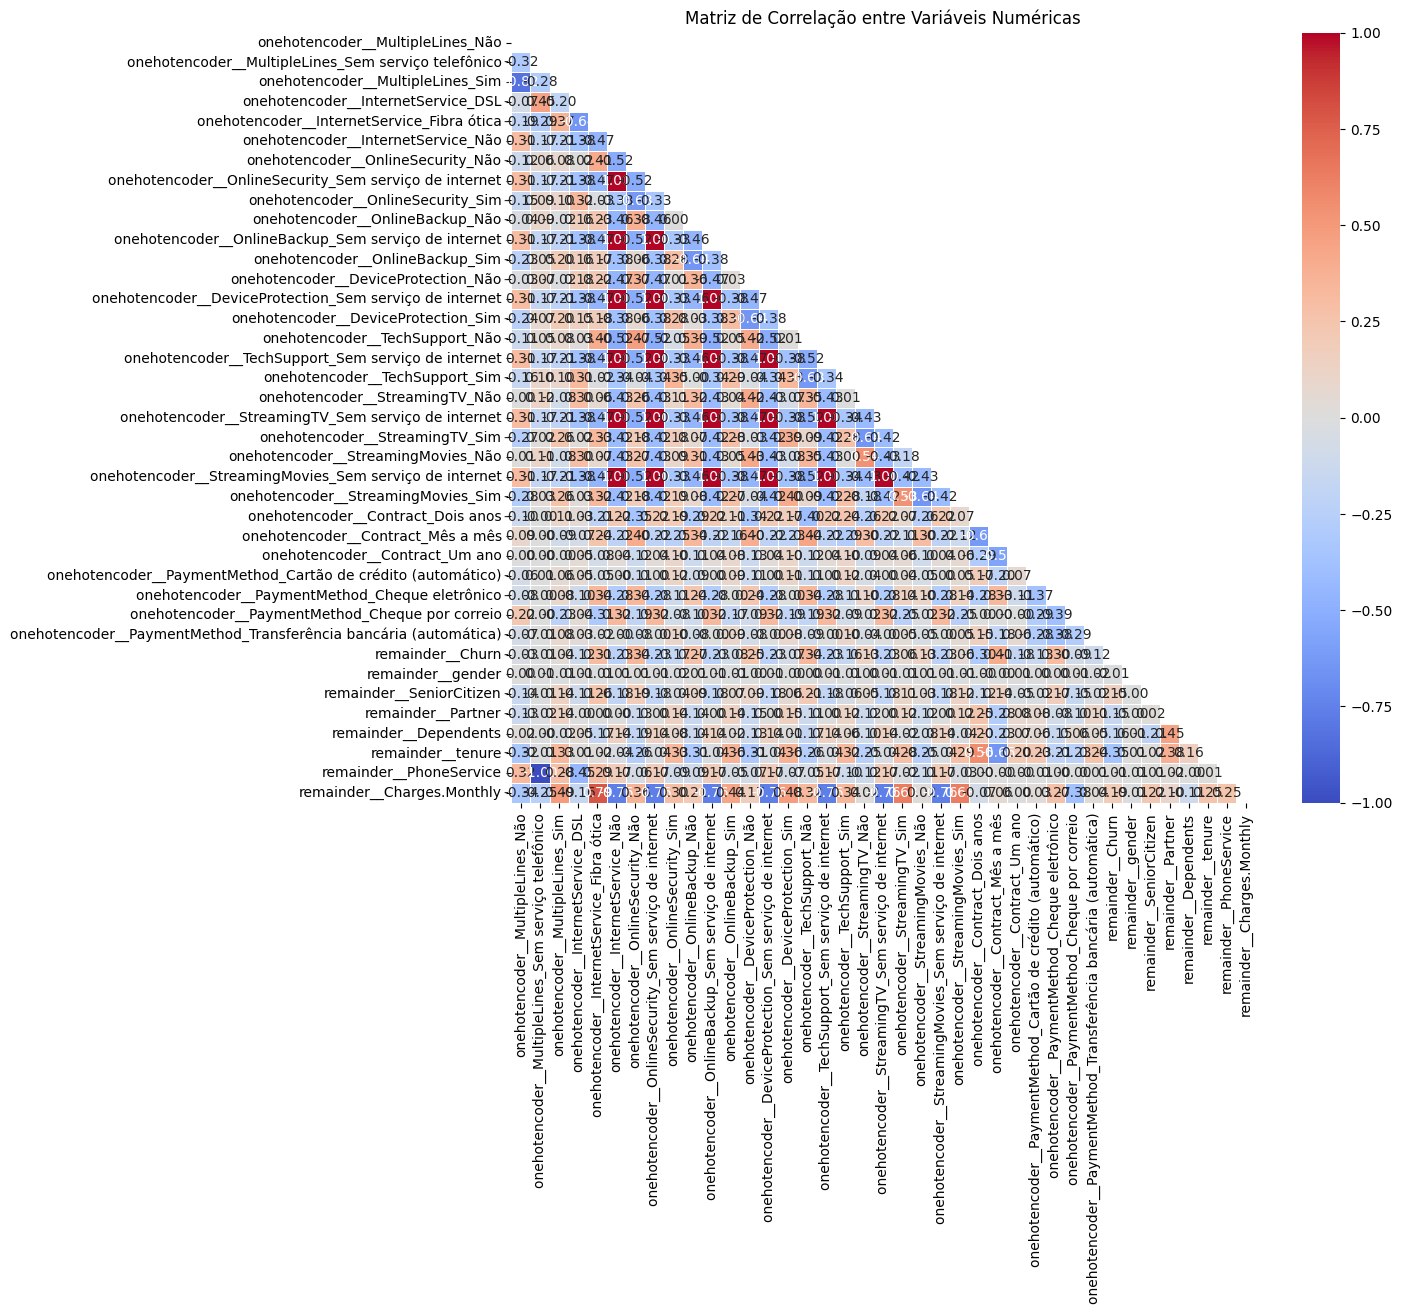

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_corr,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            linewidths=0.5,
            mask=np.triu(matriz_corr))  # opcional: esconde metade da matriz
plt.title("Matriz de Correla√ß√£o entre Vari√°veis Num√©ricas")
plt.show()

In [17]:
correlacoes_churn = matriz_corr['remainder__Churn'].sort_values(ascending=False)
print(correlacoes_churn)

remainder__Churn                                                    1.000000
onehotencoder__Contract_M√™s a m√™s                                   0.405103
onehotencoder__OnlineSecurity_N√£o                                   0.342637
onehotencoder__TechSupport_N√£o                                      0.337281
onehotencoder__InternetService_Fibra √≥tica                          0.308020
onehotencoder__PaymentMethod_Cheque eletr√¥nico                      0.301919
onehotencoder__OnlineBackup_N√£o                                     0.268005
onehotencoder__DeviceProtection_N√£o                                 0.252481
remainder__Charges.Monthly                                          0.193356
remainder__SeniorCitizen                                            0.150889
onehotencoder__StreamingMovies_N√£o                                  0.130845
onehotencoder__StreamingTV_N√£o                                      0.128916
onehotencoder__StreamingTV_Sim                                    

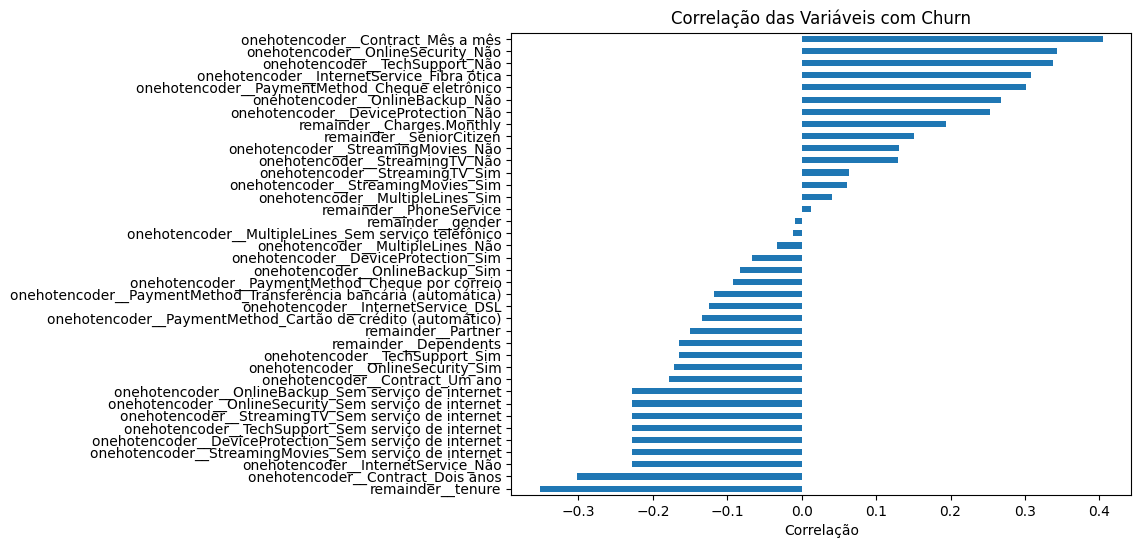

In [18]:
correlacoes_churn.drop('remainder__Churn').sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Correla√ß√£o das Vari√°veis com Churn')
plt.xlabel('Correla√ß√£o')
plt.show()

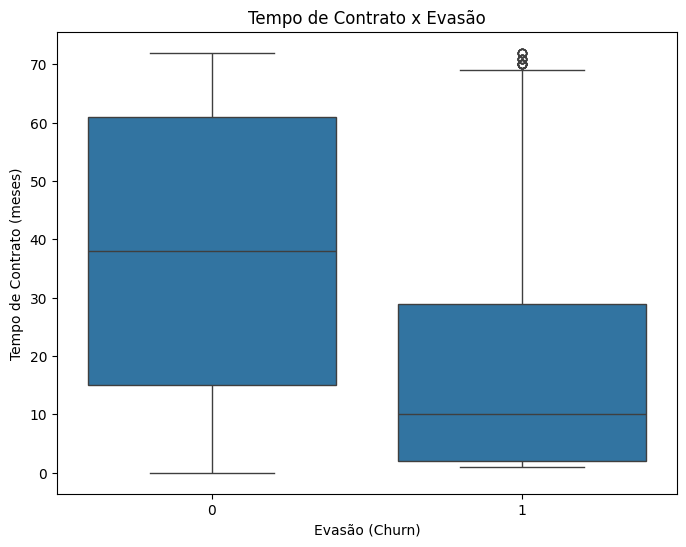

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(x='remainder__Churn', y='remainder__tenure', data=dados_hot)
plt.title('Tempo de Contrato x Evas√£o')
plt.xlabel('Evas√£o (Churn)')
plt.ylabel('Tempo de Contrato (meses)')
plt.show()

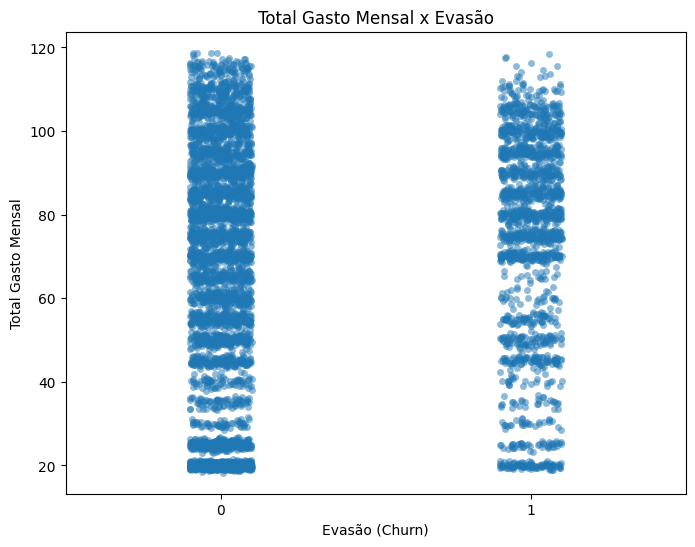

In [20]:
plt.figure(figsize=(8,6))
sns.stripplot(x='remainder__Churn', y='remainder__Charges.Monthly', data=dados_hot, jitter=True, alpha=0.5)
plt.title('Total Gasto Mensal x Evas√£o')
plt.xlabel('Evas√£o (Churn)')
plt.ylabel('Total Gasto Mensal')
plt.show()

In [21]:
teste = (dados_hot.corr()['remainder__Churn'] <= -0.19) | (dados_hot.corr()['remainder__Churn'] >= 0.19)

In [22]:
teste.value_counts()

remainder__Churn
False    21
True     18
Name: count, dtype: int64

In [23]:
dados_hot_filtrado = dados_hot.loc[:,teste]
dados_hot_filtrado

onehotencoder__InternetService_Fibra √≥tica  \
0                                            0.0   
1                                            0.0   
2                                            1.0   
3                                            1.0   
4                                            1.0   
...                                          ...   
7038                                         0.0   
7039                                         1.0   
7040                                         0.0   
7041                                         0.0   
7042                                         0.0   

      onehotencoder__InternetService_N√£o  onehotencoder__OnlineSecurity_N√£o  \
0                                    0.0                                1.0   
1                                    0.0                                1.0   
2                                    0.0                                1.0   
3                                    0.0                                1.0   
4                                    0.0                                1.0   
...                                  ...                                ...   
7038                                 0.0                                0.0   
7039                                 0.0                                1.0   
7040                                 0.0                                1.0   
7041                                 0.0                                0.0   
7042                                 0.0                                0.0   

      onehotencoder__OnlineSecurity_Sem servi√ßo de internet  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.0       
3                                                   0.0       
4                                                   0.0       
...                                                 ...       
7038                                                0.0       
7039                                                0.0       
7040                                                0.0       
7041                                                0.0       
7042                                                0.0       

      onehotencoder__OnlineBackup_N√£o  \
0                                 0.0   
1                                 1.0   
2                                 1.0   
3                                 0.0   
4                                 1.0   
...                               ...   
7038                              1.0   
7039                              1.0   
7040                              0.0   
7041                              1.0   
7042                              0.0   

      onehotencoder__OnlineBackup_Sem servi√ßo de internet  \
0                                                   0.0     
1                                                   0.0     
2                                                   0.0     
3                                                   0.0     
4                                                   0.0     
...                                                 ...     
7038                                                0.0     
7039                                                0.0     
7040                                                0.0     
7041                                                0.0     
7042                                                0.0     

      onehotencoder__DeviceProtection_N√£o  \
0                                     1.0   
1                                     1.0   
2                                     0.0   
3                                     0.0   
4                                     1.0   
...                                   ...   
7038                                  1.0   
7039                                  1.0   
7040                                 

<Axes: >

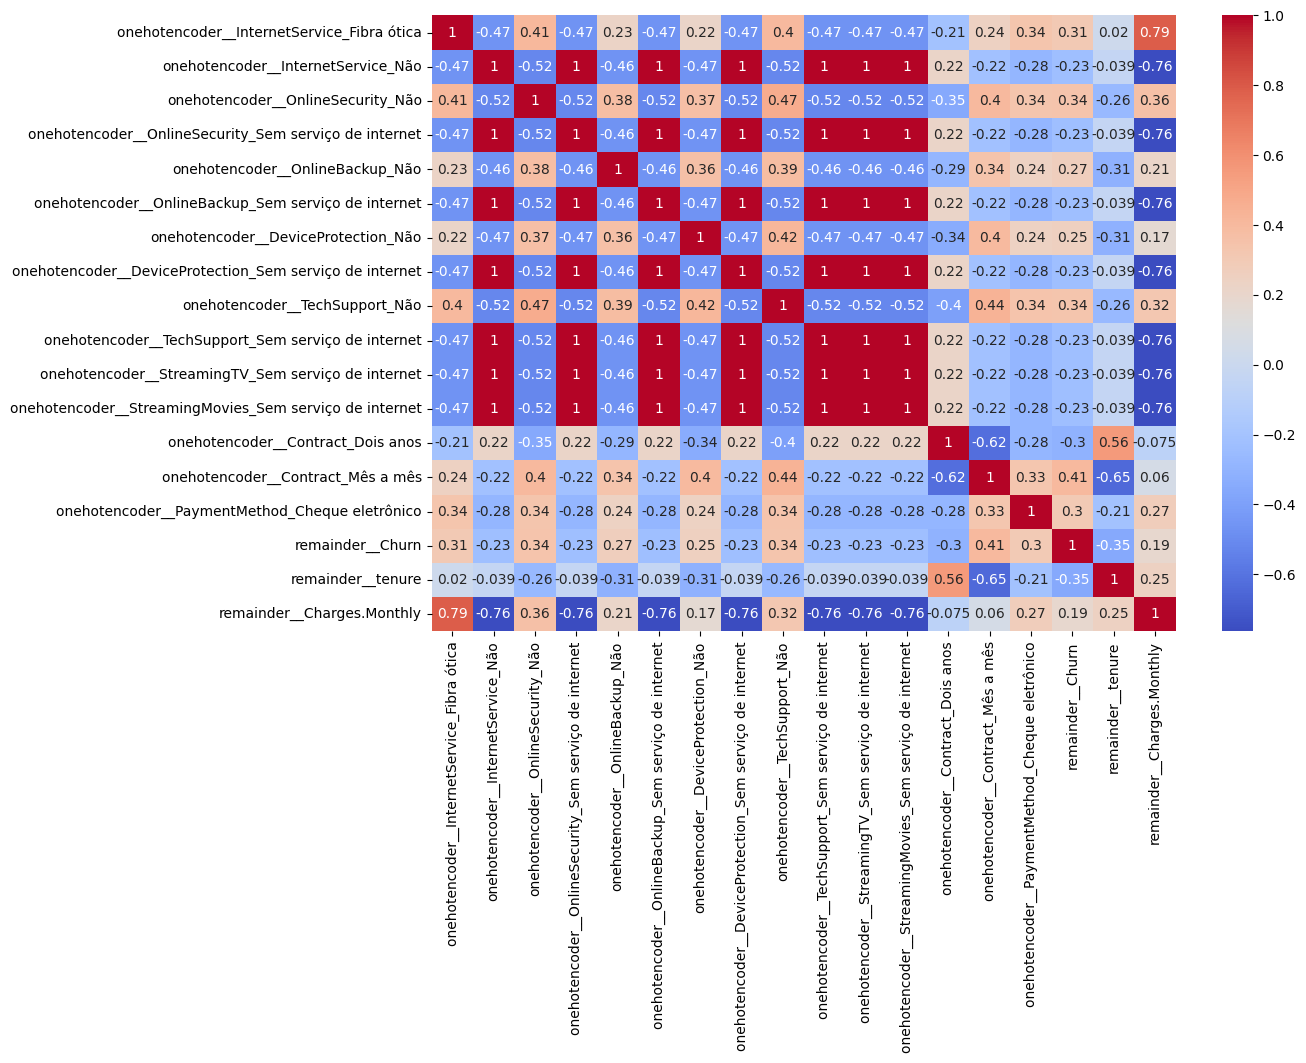

In [24]:


corr = dados_hot_filtrado.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [25]:
dados_hot_filtrado.dtypes

onehotencoder__InternetService_Fibra √≥tica                 float64
onehotencoder__InternetService_N√£o                         float64
onehotencoder__OnlineSecurity_N√£o                          float64
onehotencoder__OnlineSecurity_Sem servi√ßo de internet      float64
onehotencoder__OnlineBackup_N√£o                            float64
onehotencoder__OnlineBackup_Sem servi√ßo de internet        float64
onehotencoder__DeviceProtection_N√£o                        float64
onehotencoder__DeviceProtection_Sem servi√ßo de internet    float64
onehotencoder__TechSupport_N√£o                             float64
onehotencoder__TechSupport_Sem servi√ßo de internet         float64
onehotencoder__StreamingTV_Sem servi√ßo de internet         float64
onehotencoder__StreamingMovies_Sem servi√ßo de internet     float64
onehotencoder__Contract_Dois anos                          float64
onehotencoder__Contract_M√™s a m√™s                          float64
onehotencoder__PaymentMethod_Cheque eletr√¥nico             float64
remainder__Churn                                             int64
remainder__tenure                                            int64
remainder__Charges.Monthly                                 float64
dtype: object

In [26]:
# criando data frame normalizado usando as colunas ja filtradas
from sklearn.preprocessing import MinMaxScaler
dados_hot_filtrado_norm = dados_hot_filtrado.copy()

scaler = MinMaxScaler()
colunas = ['remainder__tenure', 'remainder__Charges.Monthly']

dados_hot_filtrado_norm[colunas] = scaler.fit_transform(dados_hot_filtrado_norm[colunas])
dados_hot_filtrado_norm[colunas]

remainder__tenure  remainder__Charges.Monthly
0              0.125000                    0.471144
1              0.125000                    0.414428
2              0.055556                    0.553731
3              0.180556                    0.793532
4              0.041667                    0.653234
...                 ...                         ...
7038           0.180556                    0.367164
7039           0.305556                    0.665174
7040           0.027778                    0.318905
7041           0.930556                    0.493532
7042           0.875000                    0.405473

[7043 rows x 2 columns]

In [27]:
# funcao com as metricas de avalicao do modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def avaliar_modelo(y_true, y_pred):
    """
    Avalia um modelo de classifica√ß√£o usando m√©tricas padr√£o.

    Par√¢metros:
    - y_true: r√≥tulos reais (array, lista ou Series)
    - y_pred: r√≥tulos previstos pelo modelo

    Retorna:
    - Print das m√©tricas e da matriz de confus√£o
    """

    print("üîç Avalia√ß√£o do Modelo:")
    print("-" * 30)
    print(f"Acur√°cia       : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precis√£o       : {precision_score(y_true, y_pred):.4f}")
    print(f"Recall         : {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score       : {f1_score(y_true, y_pred):.4f}")
    print("-" * 30)
    print("üìä Matriz de Confus√£o:")
    print(confusion_matrix(y_true, y_pred))
    print("-" * 30)
    print("üìÑ Relat√≥rio de Classifica√ß√£o:")
    print(classification_report(y_true, y_pred))

In [28]:
from sklearn.model_selection import train_test_split
# separacao do treino e teste com o data frame nao normalizado
y = dados_hot_filtrado['remainder__Churn']
x = dados_hot_filtrado.drop('remainder__Churn', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)




In [29]:
#treinando o data frame nao normalizado
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=10)
model.fit(x_train,y_train)
y_prev = model.predict(x_test)
avaliar_modelo(y_test,y_prev)

üîç Avalia√ß√£o do Modelo:
------------------------------
Acur√°cia       : 0.7553
Precis√£o       : 0.5356
Recall         : 0.5270
F1-Score       : 0.5313
------------------------------
üìä Matriz de Confus√£o:
[[1303  254]
 [ 263  293]]
------------------------------
üìÑ Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1557
           1       0.54      0.53      0.53       556

    accuracy                           0.76      2113
   macro avg       0.68      0.68      0.68      2113
weighted avg       0.75      0.76      0.75      2113



In [30]:
# separacao do treino e teste com o data frame normalizado
y = dados_hot_filtrado_norm['remainder__Churn']
x = dados_hot_filtrado_norm.drop('remainder__Churn', axis=1)

x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x,y, test_size=0.3, random_state=2)

In [31]:
#treinando o data frame normalizado
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_norm,y_train_norm)
y_prev_norm = model.predict(x_test_norm)
avaliar_modelo(y_test_norm,y_prev_norm)

üîç Avalia√ß√£o do Modelo:
------------------------------
Acur√°cia       : 0.8045
Precis√£o       : 0.6531
Recall         : 0.5486
F1-Score       : 0.5963
------------------------------
üìä Matriz de Confus√£o:
[[1395  162]
 [ 251  305]]
------------------------------
üìÑ Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1557
           1       0.65      0.55      0.60       556

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.80      0.80      2113



In [32]:
#aplicar validacao cruzado no modelo que parece mais adequado (LogisticRegression)
from sklearn.model_selection import cross_validate, KFold
model = LogisticRegression()
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
resulte = cross_validate(model ,x_train_norm, y_train_norm, cv=kf, scoring='recall')

In [33]:
media = resulte['test_score'].mean()
desvio_padrao = resulte['test_score'].std()
print(f'min:{media - 2*desvio_padrao}, max:{media + 2*desvio_padrao}')

min:0.4638122343692832, max:0.566333390032643


In [34]:
# estratificando os dados para ver da melhor maneiro o score do modelo
from sklearn.model_selection import StratifiedKFold
model = LogisticRegression()
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
resulte = cross_validate(model ,x_train_norm, y_train_norm, cv=skf, scoring='recall')
resulte

{'fit_time': array([0.02950001, 0.0239718 , 0.03584313, 0.05996251, 0.03598952]),
 'score_time': array([0.00951266, 0.00603032, 0.0072751 , 0.01069188, 0.00578141]),
 'test_score': array([0.45038168, 0.51145038, 0.5513308 , 0.53231939, 0.53612167])}

In [35]:
media = resulte['test_score'].mean()
desvio_padrao = resulte['test_score'].std()
print(f'min:{media - 2*desvio_padrao}, max:{media + 2*desvio_padrao}')

min:0.44563603060530993, max:0.5870055390693192


In [36]:
# usando oversample para tentar aprimorar o modelo
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train_balanceado, y_train_balanceado = oversample.fit_resample(x_train_norm,y_train_norm)
y_train_balanceado.value_counts(normalize=True)

remainder__Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

In [37]:
model = LogisticRegression()
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
resulte = cross_validate(model ,x_train_balanceado, y_train_balanceado, cv=kf, scoring='recall')
media = resulte['test_score'].mean()
desvio_padrao = resulte['test_score'].std()
print(f'min:{media - 2*desvio_padrao}, max:{media + 2*desvio_padrao}')

min:0.7935152740513685, max:0.8333416141787553


In [38]:
from imblearn.pipeline import Pipeline as imbpipiline
model = LogisticRegression()
pipeline = imbpipiline([('oversample', SMOTE()), ('regression', model)])

In [39]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
resulte = cross_validate(pipeline ,x_train_norm, y_train_norm, cv=kf, scoring='recall')
media = resulte['test_score'].mean()
desvio_padrao = resulte['test_score'].std()
print(f'min:{media - 2*desvio_padrao}, max:{media + 2*desvio_padrao}')

min:0.7573769722021536, max:0.8461294912099772


In [40]:
model.fit(x_train_balanceado,y_train_balanceado)
y_prev = model.predict(x_test)
avaliar_modelo(y_test,y_prev)

üîç Avalia√ß√£o do Modelo:
------------------------------
Acur√°cia       : 0.6484
Precis√£o       : 0.4158
Recall         : 0.8309
F1-Score       : 0.5543
------------------------------
üìä Matriz de Confus√£o:
[[908 649]
 [ 94 462]]
------------------------------
üìÑ Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.91      0.58      0.71      1557
           1       0.42      0.83      0.55       556

    accuracy                           0.65      2113
   macro avg       0.66      0.71      0.63      2113
weighted avg       0.78      0.65      0.67      2113



In [41]:
# usando under_sampling para ver se nao perco tanta precisao do modelo
from imblearn.under_sampling import NearMiss
model = LogisticRegression()
pipeline = imbpipiline([('undersample', NearMiss(version = 3)), ('regression', model)])
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
resulte = cross_validate(pipeline ,x_train_norm, y_train_norm, cv=kf, scoring='recall')
media = resulte['test_score'].mean()
desvio_padrao = resulte['test_score'].std()
print(f'min:{media - 2*desvio_padrao}, max:{media + 2*desvio_padrao}')

min:0.6080750681132171, max:0.717362472399126


In [42]:
undersample = NearMiss()
x_train_balanceado, y_train_balanceado = undersample.fit_resample(x_train_norm,y_train_norm)
model.fit(x_train_balanceado,y_train_balanceado)
y_prev = model.predict(x_test)
avaliar_modelo(y_test,y_prev)

üîç Avalia√ß√£o do Modelo:
------------------------------
Acur√°cia       : 0.7482
Precis√£o       : 0.5188
Recall         : 0.5971
F1-Score       : 0.5552
------------------------------
üìä Matriz de Confus√£o:
[[1249  308]
 [ 224  332]]
------------------------------
üìÑ Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1557
           1       0.52      0.60      0.56       556

    accuracy                           0.75      2113
   macro avg       0.68      0.70      0.69      2113
weighted avg       0.76      0.75      0.75      2113



In [45]:
model = LogisticRegression()
model.fit(x_train_norm,y_train_norm)
coef = model.coef_[0]
variaveis = x_train_norm.columns

# Cria dataframe de import√¢ncia
importancia_logistica = pd.DataFrame({
    'Vari√°vel': variaveis,
    'Coeficiente': coef,
    'Import√¢ncia_Absoluta': np.abs(coef)
}).sort_values(by='Import√¢ncia_Absoluta', ascending=False)

print(importancia_logistica)

                                             Vari√°vel  Coeficiente  \
15                                  remainder__tenure    -2.008443   
16                         remainder__Charges.Monthly     0.856760   
12                  onehotencoder__Contract_Dois anos    -0.841776   
13                  onehotencoder__Contract_M√™s a m√™s     0.765659   
0          onehotencoder__InternetService_Fibra √≥tica     0.676343   
14     onehotencoder__PaymentMethod_Cheque eletr√¥nico     0.458523   
2                   onehotencoder__OnlineSecurity_N√£o     0.338550   
8                      onehotencoder__TechSupport_N√£o     0.338545   
4                     onehotencoder__OnlineBackup_N√£o     0.169142   
6                 onehotencoder__DeviceProtection_N√£o    -0.108747   
5   onehotencoder__OnlineBackup_Sem servi√ßo de int...    -0.021812   
1                  onehotencoder__InternetService_N√£o    -0.021812   
3   onehotencoder__OnlineSecurity_Sem servi√ßo de i...    -0.021812   
7   oneh

# Relat√≥rio de An√°lise de Evas√£o de Clientes

## 1. Desempenho do Modelo

O modelo utilizado foi **Regress√£o Log√≠stica** com aplica√ß√£o de **oversampling** para balanceamento da classe minorit√°ria.  
Os resultados obtidos foram:

- **Acur√°cia:** 0.6484  
- **Precis√£o:** 0.4158  
- **Recall:** 0.8309  
- **F1-Score:** 0.5543  

### Matriz de Confus√£o
|                | Predito N√£o Evas√£o (0) | Predito Evas√£o (1) |
|----------------|------------------------|--------------------|
| **Real 0**     | 908                    | 649                |
| **Real 1**     | 94                     | 462                |

### Relat√≥rio de Classifica√ß√£o
| Classe | Precis√£o | Recall | F1-Score | Suporte |
|--------|----------|--------|----------|---------|
| 0      | 0.91     | 0.58   | 0.71     | 1557    |
| 1      | 0.42     | 0.83   | 0.55     | 556     |
| **M√©dia/Total** | **0.78** | **0.65** | **0.67** | 2113 |

---

## 2. Principais Fatores que Influenciam a Evas√£o

A import√¢ncia das vari√°veis foi calculada com base nos coeficientes da regress√£o log√≠stica. Valores positivos indicam aumento na probabilidade de evas√£o, e valores negativos indicam diminui√ß√£o.

| Vari√°vel                                                   | Coeficiente | Import√¢ncia Absoluta |
|------------------------------------------------------------|-------------|----------------------|
| `remainder__tenure`                                        | -2.008443   | 2.008443             |
| `remainder__Charges.Monthly`                               | 0.856760    | 0.856760             |
| `onehotencoder__Contract_Dois anos`                        | -0.841776   | 0.841776             |
| `onehotencoder__Contract_M√™s a m√™s`                        | 0.765659    | 0.765659             |
| `onehotencoder__InternetService_Fibra √≥tica`               | 0.676343    | 0.676343             |
| `onehotencoder__PaymentMethod_Cheque eletr√¥nico`           | 0.458523    | 0.458523             |
| `onehotencoder__OnlineSecurity_N√£o`                        | 0.338550    | 0.338550             |
| `onehotencoder__TechSupport_N√£o`                           | 0.338545    | 0.338545             |
| `onehotencoder__OnlineBackup_N√£o`                          | 0.169142    | 0.169142             |
| `onehotencoder__DeviceProtection_N√£o`                      | -0.108747   | 0.108747             |
| Demais vari√°veis                                            | ‚âà ¬±0.021812 | 0.021812             |

---

## 3. Interpreta√ß√£o dos Resultados

- **Tempo de contrato (`tenure`)** foi o fator mais relevante, com coeficiente negativo, indicando que clientes com mais tempo de perman√™ncia tendem a **evadir menos**.
- **Cobran√ßa mensal alta (`Charges.Monthly`)** est√° associada a **maior probabilidade de evas√£o**.
- Contratos **mensais** aumentam o risco de sa√≠da, enquanto contratos de **dois anos** reduzem significativamente esse risco.
- Usu√°rios com **internet de fibra √≥ptica**, **pagamento por cheque eletr√¥nico**, **sem seguran√ßa online** ou **sem suporte t√©cnico** apresentam maior tend√™ncia √† evas√£o.
- A aus√™ncia de **backup online** tamb√©m est√° associada √† maior evas√£o, embora com menor peso.

---

## 4. Estrat√©gias de Reten√ß√£o Sugeridas

Com base nos resultados:
1. **Fideliza√ß√£o por contratos longos:** oferecer benef√≠cios e descontos para migra√ß√£o de contrato mensal para anual ou bienal.
2. **Ajuste de pre√ßos para clientes em risco:** reduzir mensalidade para usu√°rios com alto custo mensal e baixa fidelidade.
3. **Aprimorar suporte e seguran√ßa online:** oferecer pacotes com suporte t√©cnico e seguran√ßa digital gratuitos ou com desconto.
4. **Campanhas para novos clientes:** foco em reten√ß√£o nos primeiros meses, per√≠odo mais cr√≠tico para evas√£o.

---
